# This is the start!!!

## Preprocessing (Run only for first time):

In [7]:
import csv
import urllib
import os
from multiprocessing.dummy import Pool # use threads for I/O bound tasks
import threading
line_count = 0
threadLock = threading.Lock()

# can start with 100 for now
sample_size = 100
processed_list = []

def retrieve(row):
    global line_count
        
    with threadLock:
        line_count += 1
        
    poster_id = row[0]
    title = row[2]
    imdb_score = row[3]
    genre = row[4]
    poster_url = row[5]
    # print(f'Currently requesting poster id {poster_id}')

    # Filter empty fields/broken url links    
    if title == "" or imdb_score == "" or genre == "" or poster_url == "":
        return
    else:
        try:
            fullfilename = os.path.join("./SamplePosters", f"{poster_id}.jpg")
            urllib.request.urlretrieve(poster_url, fullfilename)
        except:
            print(f"Poster {poster_id} at {poster_url} not found")
            return

    processed_list.append(row) # thread safe operation

# Download images to local disk
with open('MovieGenre.csv', encoding="latin-1") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    rows = list(csv_reader)
    print(f'Column names are {", ".join(rows[0])}')
    
    Pool(100).map(retrieve, rows[1:sample_size]) # download 100 files at a time for a total of sample_size files
            
# Wait for this message
print(f'Processed {line_count - 1} images.')

Column names are imdbId, Imdb Link, Title, IMDB Score, Genre, Poster
Poster 112302 at https://images-na.ssl-images-amazon.com/images/M/MV5BMTUxNDYzMDY1OV5BMl5BanBnXkFtZTcwNDA2MzYxMQ@@._V1_UY268_CR2,0,182,268_AL_.jpg not found
Poster 112697 at https://images-na.ssl-images-amazon.com/images/M/MV5BMTgxODIxODE2MF5BMl5BanBnXkFtZTgwOTA4NjQxMTE@._V1_UX182_CR0,0,182,268_AL_.jpg not found
Poster 115012 at https://images-na.ssl-images-amazon.com/images/M/MV5BMTgyMzAwOTQyNF5BMl5BanBnXkFtZTcwNDU1MjgxMQ@@._V1_UY268_CR1,0,182,268_AL_.jpg not found
Poster 113347 at https://images-na.ssl-images-amazon.com/images/M/MV5BNzY3NTQ0NTM0NV5BMl5BanBnXkFtZTcwODkwMzgxMQ@@._V1_UY268_CR3,0,182,268_AL_.jpg not found
Poster 110299 at https://images-na.ssl-images-amazon.com/images/M/MV5BMTk0MTI5MjU3MF5BMl5BanBnXkFtZTcwMjMzODUyMQ@@._V1_UY268_CR3,0,182,268_AL_.jpg not found
Poster 109950 at https://images-na.ssl-images-amazon.com/images/M/MV5BMTI1OTA0NDQzN15BMl5BanBnXkFtZTcwMjIwNjQyMQ@@._V1_UY268_CR102,0,182,268_AL_.j

In [3]:
import numpy as np

arr = np.hsplit(np.array(processed_list), 6)
poster_ids = arr[0].flatten()
titles = arr[2].flatten()
scores = arr[3].flatten()
genres = arr[4].flatten()

with open('ProcessedData.csv', 'w', newline="") as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in zip(poster_ids, scores, genres):
        wr.writerow(row)

# Wait for this message
print('Finished writing CSV file with columns: id, score, genre')


Finished writing CSV file with columns: id, score, genre


In [4]:
# Extracting features from image url
from skimage import io
from matplotlib import pyplot as plt
import cv2

resized_posters = []
standard_dimension = (100, 100)

for pid in poster_ids:
    filepath = f'./SamplePosters/{pid}.jpg'
    image = io.imread(filepath)
    resized_image = cv2.resize(image, standard_dimension)
    io.imsave(filepath, resized_image)

print('resize complete')

# Test resize by loading
# image = io.imread(poster_url_collection[0])
# print(f'Image Dimension Before Resize: {np.array(image).shape}')
# plt.imshow(image, interpolation='nearest')
# plt.show()

# resized_image = cv2.resize(image, standard_dimension) 
# plt.imshow(resized_image, interpolation='nearest')
# print(f'Image Dimension After Resize: {np.array(resized_image).shape}')
# plt.show()

resize complete


## We can now retrieve from our processed data

114916 (100, 100, 3)


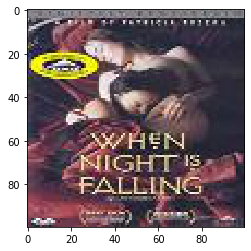

In [6]:
import csv
import os
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

# The useful outputs are saved in the lists below

# 1-d vectors
poster_ids = []
genres = []
scores = [] 

# contains np array of dim(100,100,3) for each input
images = [] 

with open('ProcessedData.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        pid = row[0]
        score = row[1]
        genre = row[2]
        filepath = f'./SamplePosters/{pid}.jpg'
        image = io.imread(filepath)
        
        poster_ids.append(pid)
        scores.append(score)
        genres.append(genre)
        images.append(np.array(image))

# Debug
print(poster_ids[0], images[0].shape)
plt.imshow(images[0], interpolation='nearest')
plt.show()  